In [7]:
# # 1) Write a python program to display all the header tags from wikipedia.org
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://en.wikipedia.org/wiki/Main_Page')
bs = BeautifulSoup(html, "html.parser")
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print('List all the header tags :', *titles, sep='\n\n')

List all the header tags :

<h1 class="firstHeading mw-first-heading" id="firstHeading" style="display: none"><span class="mw-page-title-main">Main Page</span></h1>

<h1><span class="mw-headline" id="Welcome_to_Wikipedia">Welcome to <a href="/wiki/Wikipedia" title="Wikipedia">Wikipedia</a></span></h1>

<h2 class="mp-h2" id="mp-tfa-h2"><span id="From_today.27s_featured_article"></span><span class="mw-headline" id="From_today's_featured_article">From today's featured article</span></h2>

<h2 class="mp-h2" id="mp-dyk-h2"><span class="mw-headline" id="Did_you_know_...">Did you know ...</span></h2>

<h2 class="mp-h2" id="mp-itn-h2"><span class="mw-headline" id="In_the_news">In the news</span></h2>

<h2 class="mp-h2" id="mp-otd-h2"><span class="mw-headline" id="On_this_day">On this day</span></h2>

<h2 class="mp-h2" id="mp-tfp-h2"><span id="Today.27s_featured_picture"></span><span class="mw-headline" id="Today's_featured_picture">Today's featured picture</span></h2>

<h2 class="mp-h2" id="mp

In [13]:
# # 2) Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. name, rating, year of release)and make data frame.




get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')





from bs4 import BeautifulSoup
import requests
import re
import pandas as pd




url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")




movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]




list = []




for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            }
    list.append(data)





for movie in list:
    
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'],')','-', movie['rating'])
    





df = pd.DataFrame(list)
df.to_csv('imdb_top__movies.csv',index=False)




df.head(100)

1 - The Shawshank Redemption (1994 ) - 9.234796961972448
2 - The Godfather (1972 ) - 9.156590308620206
3 - The Dark Knight (2008 ) - 8.987614491268603
4 - The Godfather Part II (1974 ) - 8.984561260108881
5 - 12 Angry Men (1957 ) - 8.949416415593024
6 - Schindler's List (1993 ) - 8.936496257834982
7 - The Lord of the Rings: The Return of the King (2003 ) - 8.923845545464664
8 - Pulp Fiction (1994 ) - 8.849622263245575
9 - The Lord of the Rings: The Fellowship of the Ring (2001 ) - 8.80516223247632
1 -  Il buono, il brutto, il cattivo (1966 ) - 8.792538428650976
11 - Forrest Gump (1994 ) - 8.767803866419799
12 - Fight Club (1999 ) - 8.749292449936839
13 - Inception (2010 ) - 8.733045050227714
14 - The Lord of the Rings: The Two Towers (2002 ) - 8.72994755852636
15 - The Empire Strikes Back (1980 ) - 8.70118787073171
16 - The Matrix (1999 ) - 8.670595221412865
17 - Goodfellas (1990 ) - 8.652704835970507
18 - One Flew Over the Cuckoo's Nest (1975 ) - 8.64032493093696
19 - Se7en (1995 ) - 

,place,movie_title,rating,year
0,1,The Shawshank Redemption,9.234796961972448,1994
1,2,The Godfather,9.156590308620206,1972
2,3,The Dark Knight,8.987614491268603,2008
3,4,The Godfather Part II,8.984561260108881,1974
4,5,12 Angry Men,8.949416415593024,1957
...,...,...,...,...
95,96,Jagten,8.255849671006507,2012
96,97,M - Eine Stadt sucht einen Mörder,8.254093517224275,1931
97,98,North by Northwest,8.252054137450031,1959
98,99,Idi i smotri,8.247958558099944,1985


In [15]:

# # 3.Write a python program to display IMDB’s Top rated 100 Indian movies’ data (i.e. name, rating, year of release) and make data frame.



get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')




from bs4 import BeautifulSoup
import requests
import re
import pandas as pd




url = 'https://www.imdb.com/india/top-rated-indian-movies/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")




movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]




list =[]



for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            }
    list.append(data)





df.head(100)



for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'],')','-', movie['rating'])
    


df = pd.DataFrame(list)
df.to_csv('imdb_top__movies.csv',index=False)




df.head(100)


1 - Rocketry: The Nambi Effect (2022 ) - 8.526456189618104
2 - Anbe Sivam (2003 ) - 8.399740275032794
3 - Golmaal (1979 ) - 8.391261455040185
4 - Nayakan (1987 ) - 8.388370444383215
5 - Jai Bhim (2021 ) - 8.383556081437096
6 - Pariyerum Perumal (2018 ) - 8.375336896331959
7 - 3 Idiots (2009 ) - 8.350751262789752
8 - Apur Sansar (1959 ) - 8.34800452447599
9 - Manichitrathazhu (1993 ) - 8.330986014474695
1 -  777 Charlie (2022 ) - 8.324543105522139
11 - Kumbalangi Nights (2019 ) - 8.316179510701122
12 - Black Friday (2004 ) - 8.313191300787228
13 - C/o Kancharapalem (2018 ) - 8.30548193706969
14 - Soorarai Pottru (2020 ) - 8.303691013002142
15 - #Home (2021 ) - 8.303427834649348
16 - Taare Zameen Par (2007 ) - 8.29899491977067
17 - Kireedam (1989 ) - 8.286815232416638
18 - Dangal (2016 ) - 8.281727550262694
19 - Kaithi (2019 ) - 8.278774626615602
20 - Jersey (2019 ) - 8.270095536073201
21 - 96 (2018 ) - 8.245492219679084
22 - Asuran (2019 ) - 8.243931373257318
23 - Thevar Magan (1992 ) -

,place,movie_title,rating,year
0,1,Rocketry: The Nambi Effect,8.526456189618104,2022
1,2,Anbe Sivam,8.399740275032794,2003
2,3,Golmaal,8.391261455040185,1979
3,4,Nayakan,8.388370444383215,1987
4,5,Jai Bhim,8.383556081437096,2021
...,...,...,...,...
95,96,Angoor,8.016714502180037,1982
96,97,Rang De Basanti,8.013556265160146,2006
97,98,Baahubali 2: The Conclusion,8.013381645492222,2017
98,99,Baasha,8.013068057404974,1995


In [16]:
# # 4) Write s python program to display list of respected former presidents of India(i.e. Name , Term of office) from https://presidentofindia.nic.in/former-presidents.htm

# In[2]:


get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')




from bs4 import BeautifulSoup
import requests
import re
import pandas as pd




page = requests.get('https://presidentofindia.nic.in/former-presidents.htm')
page




soup = BeautifulSoup(page.content)




soup




soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())




scraped_formerPresidents = soup.find_all('div',class_='presidentListing')
scraped_formerPresidents




formerPresidents = []
for formerPresident in scraped_formerPresidents:
    print(formerPresident.get_text())


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head id="Head1">
  <title>
   Former Presidents - The President of India
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <!--<meta http-equiv="Content-Style-Type" content="text/css" /><meta http-equiv="Content-Script-Type" content="type" />-->
  <meta content="telephone=no" name="format-detection"/>
  <meta content="IE=EmulateIE10" http-equiv="X-UA-Compatible"/>
  <!-- Start Favicon -->
  <link href="favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="js/panorama_viewer.css" rel="stylesheet" type="text/css"/>
  <!-- Start Viewport -->
  <!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" />-->
  <!-- Start IE CSS -->
  <!--[if IE]>
	<link href

In [17]:
# # 5) Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape:
# a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.
# b) Top 10 ODI Batsmen along with the records of their team and rating.
# c) Top 10 ODI bowlers along with the records of their team and rating.



get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')



from bs4 import BeautifulSoup
import requests
import re
import pandas as pd



page = requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
page




soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Men's ODI Team Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Men's ODI Team Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-t

In [20]:
# # 6.
get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')



from bs4 import BeautifulSoup
import requests
import re
import pandas as pd



page = requests.get('https://www.icc-cricket.com/rankings/women/team-rankings/odi')
page




soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="404 | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official ICC Cricket website - live matches, scores, news, highlights, commentary, rankings, videos and fixtures from the International Cricket Council." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="404 | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" property="og:image"/>
<title>404 | ICC</title>
<meta content="Official ICC Cricket website - live matches, scores, n

In [18]:
# # 7.Write a python program to scrape mentioned news details from https://www.cnbc.com/world/?region=world :i) Headline ii) Time iii) News Link



get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')




from bs4 import BeautifulSoup
import requests
import re
import pandas as pd



page = requests.get('https://www.cnbc.com/world/?region=world')
page




soup = BeautifulSoup(page.content)
soup




soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())




for link in soup.findAll("a"):
    print("Headlines : {}".format(link.text))



for link in soup.findAll('time',{'class' : 'LatestNews-timestamp'}):
    print("Times : {}".format(link.text))



cnbc_url="https://www.cnbc.com/world"




page = requests.get('https://www.cnbc.com/world')
page



soup = BeautifulSoup(page.content)
soup



links_list = soup.find_all('a')



for link in links_list:
    if 'href'in link.attrs:
        print(str(link.attrs['href']))


<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#">
 <head>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" hr

<!DOCTYPE html>
<html>
 <head>
  <link as="font" crossorigin="" href="/fonts/NexusSansWebPro-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/fonts/ElsevierGulliver-Regular.woff2" rel="preload" type="font/woff2"/>
  <script src="//assets.adobedtm.com/4a848ae9611a/4da1513b0562/launch-a536f9fbceee.min.js">
  </script>
  <meta name="next-font-preconnect"/>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="en_US" name="og:locale"/>
  <meta content="Most Downloaded Articles - Artificial Intelligence - Journal - Elsevier" property="og:title"/>
  <meta content="The journal of Artificial Intelligence (AIJ)  welcomes papers on broad aspects of AI that constitute advances in the overall field including, but not limited …" property="og:description"/>
  <meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image" property="og:image"/>
  <meta content="http://ars.els-cdn.com/content/image/X
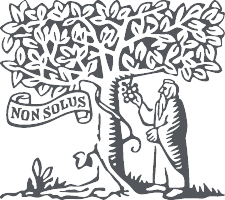
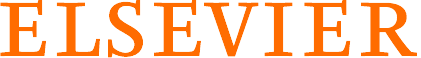

In [19]:
# # 8) Write a python program to scrape the details of most downloaded articles from AI in last 90 days.
# https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles Scrape below mentioned details : i) Paper Title ii) Authors iii) Published Date iv) Paper URL



get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')



from bs4 import BeautifulSoup
import requests
import re
import pandas as pd




page = requests.get('https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles')
page




soup = BeautifulSoup(page.content)
soup




soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())




for link in soup.findAll("h2"):
    print("PaperTitle : {}".format(link.text))




author = []

for i in soup.find_all('span',{'class' : "sc-1w3fpd7-0 pgLAT"}):
    author.append(i.text)




author




date = []

for i in soup.find_all('span',{'class' : 'sc-1thf9ly-2 bKddwo'}):
    date.append(i.text)




date




url = "https://www.journals.elsevier.com"




page = requests.get('https://www.journals.elsevier.com') 
page




soup = BeautifulSoup(page.content)
soup




soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())




links_list = soup.find_all('a')




for link in links_list:
    if 'href'in link.attrs:
        print(str(link.attrs['href']))

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="/manifest.json" rel="manifest"/>
  <style type="text/css">
   @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{


In [22]:
## 10) Write a python program to scrape the details of top publications from Google Scholar from 
#  https://scholar.google.com/citations?view_op=top_venues&hl=en
#  i) Rank 
#  ii) Publication
#  iii) h5-index
#  iv) h5-median

!pip install bs4
!pip install requests

In [23]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [24]:
page = requests.get('https://scholar.google.com/citations?view_op=top_venues&hl=en')
page

<Response [200]>

In [25]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html><head><title>English - Google Scholar Metrics</title><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="always" name="referrer"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=2" name="viewport"/><meta content="telephone=no" name="format-detection"/><link href="/favicon.ico" rel="shortcut icon"/><style>html,body,form,table,div,h1,h2,h3,h4,h5,h6,img,ol,ul,li,button{margin:0;padding:0;border:0;}table{border-collapse:collapse;border-width:0;empty-cells:show;}html,body{height:100%}#gs_top{position:relative;box-sizing:border-box;min-height:100%;min-width:964px;-webkit-tap-highlight-color:rgba(0,0,0,0);}#gs_top>*:not(#x){-webkit-tap-highlight-color:rgba(204,204,204,.5);}.gs_el_ph #gs_top,.gs_el_ta #gs_top{min-width:320px;}#gs_top.gs_nscl{position:fixed;width:100%;}body,td,input,button{font-size:13px;font-family:Arial,sans-serif;line-height:1.24;}body{bac

In [26]:
rank = []
publication = []

In [27]:
for i in soup.find_all('td',class_="gsc_mvt_p"):
    rank.append(i.text)


In [28]:
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '42.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '68.',
 '69.',
 '70.',
 '71.',
 '72.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.']

In [33]:
for i in soup.find_all('td',class_="gsc_mvt_t"):
    publication.append(i.text)

In [36]:
publication

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '42.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '68.',
 '69.',
 '70.',
 '71.',
 '72.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.',
 'Nature',
 'The New England Journal of Medicine',
 'Science',
 'IEEE/CVF Conference on Computer Vision and Pattern Recognition',
 'The Lancet',
 'Advanced Materials',
 'Nature Communications',
 'Cell',
 'Int

In [37]:
citation = []

In [38]:
for i in soup.find_all('td',class_="gsc_mvt_n"):
   citation.append(i.text)

In [39]:
 citation

['444',
 '667',
 '432',
 '780',
 '401',
 '614',
 '389',
 '627',
 '354',
 '635',
 '312',
 '418',
 '307',
 '428',
 '300',
 '505',
 '286',
 '533',
 '278',
 '436',
 '267',
 '425',
 '265',
 '444',
 '256',
 '364',
 '245',
 '332',
 '244',
 '386',
 '242',
 '344',
 '239',
 '415',
 '238',
 '550',
 '237',
 '421',
 '235',
 '389',
 '227',
 '324',
 '225',
 '311',
 '220',
 '300',
 '213',
 '315',
 '211',
 '277',
 '211',
 '273',
 '210',
 '280',
 '207',
 '294',
 '206',
 '274',
 '202',
 '329',
 '202',
 '290',
 '200',
 '303',
 '198',
 '278',
 '197',
 '294',
 '195',
 '276',
 '192',
 '246',
 '191',
 '297',
 '190',
 '307',
 '189',
 '301',
 '186',
 '321',
 '183',
 '253',
 '181',
 '265',
 '181',
 '224',
 '180',
 '296',
 '178',
 '220',
 '177',
 '223',
 '175',
 '315',
 '173',
 '296',
 '173',
 '228',
 '173',
 '217',
 '172',
 '232',
 '170',
 '314',
 '169',
 '304',
 '167',
 '234',
 '166',
 '254',
 '165',
 '296',
 '165',
 '293',
 '165',
 '243',
 '165',
 '229',
 '164',
 '231',
 '164',
 '207',
 '163',
 '302',
 '163',


In [41]:
# # 9) Write a python program to scrape mentioned details from dineout.co.in :
# i) Restaurant name ii) Cuisine iii) Location iv) Ratings v) Image URL



get_ipython().system('pip install bs4')
get_ipython().system('pip install requests')




from bs4 import BeautifulSoup
import requests
import re
import pandas as pd



page = requests.get('https://www.dineout.co.in/delhi-restaurants/buffet-special')
page


<Response [200]>

In [43]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="/manifest.json" rel="manifest"/>
  <style type="text/css">
   @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{


In [44]:
# RESTAURANT NAME
scraped_restaurant_name = soup.find_all('a',class_="restnt-name ellipsis")
scraped_restaurant_name


[<a analytics-action="RestaurantCardClick" analytics-label="86792_Castle Barbeque" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/castle-barbeque-connaught-place-central-delhi-86792">Castle Barbeque</a>,
 <a analytics-action="RestaurantCardClick" analytics-label="59633_Jungle Jamboree" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/jungle-jamboree-lajpat-nagar-3-south-delhi-59633">Jungle Jamboree</a>,
 <a analytics-action="RestaurantCardClick" analytics-label="38113_Castle Barbeque" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/castle-barbeque-tagore-garden-west-delhi-38113">Castle Barbeque</a>,
 <a analytics-action="RestaurantCardClick" analytics-label="406_Cafe Knosh" class="restnt-name ellipsis" data-w-onclick="sendAnalyticsCommon|w1-restarant" href="/delhi/cafe-knosh-shahdara-east-delhi-406">Cafe Knosh</a>,
 <a analytics-action="RestaurantCardClick

In [45]:
#EMPTY LIST
restaurant_name = []

#Restaurant name
for rn in scraped_restaurant_name:
    rn = rn.get_text().replace('\n','')
    restaurant_name.append(rn)
restaurant_name

['Castle Barbeque',
 'Jungle Jamboree',
 'Castle Barbeque',
 'Cafe Knosh',
 'The Barbeque Company',
 'India Grill',
 'Delhi Barbeque',
 'The Monarch - Bar Be Que Village',
 'Indian Grill Room']

In [49]:
# Cuisine 
scraped_cuisines = soup.find_all('div',class_="filter-component-wrap cuisine-wrap")
scraped_cuisines

[<div class="filter-component-wrap cuisine-wrap"><h4 aria-controls="cuisine" aria-expanded="" data-key="cuisine" data-toggle="collapse" data-w-onclick="openFilter|w1-filters" href="#cuisine" role="button"><span>Cuisines</span><em class="minus">-</em><em class="plus">+</em></h4><div class="collapse filter-options-wrap in" id="cuisine"><div class="form-group"><input autocomplete="off" class="form-control" data-key="cuisine" data-name="Cuisines" data-w-onkeyup="searchFilter|w1-filters" placeholder="Search For Cuisine" type="text" value=""/></div><ul class="options"><li data-name="North Indian" data-parentkey="cuisine" data-type="CHECKBOX" data-w-events="w1-filters,click,checkFilterFn" data-w-onclick="checkFilterCheck|w1-filters-filter[4]" data-widget="/dineout.co.in$0.0.2/girf/components/listing-filter-checkbox/index" href="javascript:void(0)" id="w1-filters-filter[4]" title="restaurants in North Indian"><a href="javascript:void(0)" title="restaurants in North Indian">North Indian</a></li

In [54]:
#EMPTY LIST
cuisines = []

#cuisines
for c in scraped_cuisines:
    c = c.get_text().replace('\n',' ')
cuisines.append(c)
cuisines

['Cuisines-+North IndianChineseItalianAsianShow More (2)']

In [55]:
# Location
scraped_location = soup.find_all('div',class_="restnt-loc ellipsis")
scraped_location

[<div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a data-name="Connaught Place" data-type="LocalityClick" href="/delhi-restaurants/central-delhi/connaught-place">Connaught Place</a>, <a data-name="Central Delhi" data-type="AreaClick" href="/delhi-restaurants/central-delhi">Central Delhi</a></div>,
 <div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a href="/delhi-restaurants/3cs-mall-landmark">3CS Mall,</a><a data-name="Lajpat Nagar - 3" data-type="LocalityClick" href="/delhi-restaurants/south-delhi/lajpat-nagar-3">Lajpat Nagar - 3</a>, <a data-name="South Delhi" data-type="AreaClick" href="/delhi-restaurants/south-delhi">South Delhi</a></div>,
 <div class="restnt-loc ellipsis" data-w-onclick="stopClickPropagation|w1-restarant"><a href="/delhi-restaurants/pacific-mall-landmark">Pacific Mall,</a><a data-name="Tagore Garden" data-type="LocalityClick" href="/delhi-restaurants/west-delhi/tagore-garden">Tagore Garden</a>,

In [57]:
#EMPTY LIST
location = []

#Location
for l in scraped_location :
    l = l.get_text().replace('\n',' ')
location.append(l)
location

['Suncity Business Tower,Golf Course Road, Gurgaon']

In [62]:
#Ratings
scraped_ratings = soup.find_all('div',class_="restnt-rating rating-4")
scraped_ratings

[<div class="restnt-rating rating-4">4.1</div>,
 <div class="restnt-rating rating-4">3.9</div>,
 <div class="restnt-rating rating-4">3.9</div>,
 <div class="restnt-rating rating-4">4.3</div>,
 <div class="restnt-rating rating-4">4</div>,
 <div class="restnt-rating rating-4">3.9</div>,
 <div class="restnt-rating rating-4">3.7</div>,
 <div class="restnt-rating rating-4">3.8</div>,
 <div class="restnt-rating rating-4">4.3</div>]

In [63]:

#EMPTY LIST
ratings = []

#Location
for r in scraped_ratings :
    r = r.get_text().replace('\n',' ')
ratings.append(r)
ratings

['4.3']

In [64]:
# Image URL
scraped_image_url = soup.find_all('img',class_= "no-img")
scraped_image_url

[<img alt="Castle Barbeque" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/8/k/b/p86792-16062953735fbe1f4d3fb7e.jpg?tr=tr:n-medium" data-url="/delhi/castle-barbeque-connaught-place-central-delhi-86792" data-w-onclick="cardClickHandler"/>,
 <img alt="Jungle Jamboree" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/p/m/p59633-166088382462ff137009010.jpg?tr=tr:n-medium" data-url="/delhi/jungle-jamboree-lajpat-nagar-3-south-delhi-59633" data-w-onclick="cardClickHandler"/>,
 <img alt="Castle Barbeque" class="lazy-load-img no-img" data-gatype="RestaurantImageClick" data-src="https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/j/o/p38113-15959192065f1fcb666130c.jpg?tr=tr:n-medium" data-url="/delhi/castle-barbeque-tagore-garden-west-delhi-38113" data-w-onclick="cardClickHandler"/>,
 <img alt="Cafe Knosh" class="

In [69]:
#EMPTY LIST
image_url = []

#Location
for i in scraped_image_url :
    i = i.get_text().replace('\n',' ')
image_url.append(i)
image_url

['']